In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [64]:
train=pd.read_csv('Bigdatamart_Train.csv')
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [65]:
test=pd.read_csv('Bigdatamart_Test.csv')
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [66]:
train.shape , test.shape

((8523, 12), (5681, 11))

In [67]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [68]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [69]:
print(train.dtypes)
print(train.info())

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-nu

In [70]:
print(test.dtypes)
print(test.info())

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier  

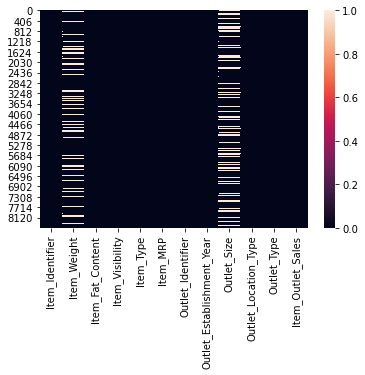

In [71]:
#Checking null values
sns.heatmap(train.isnull())

In [72]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

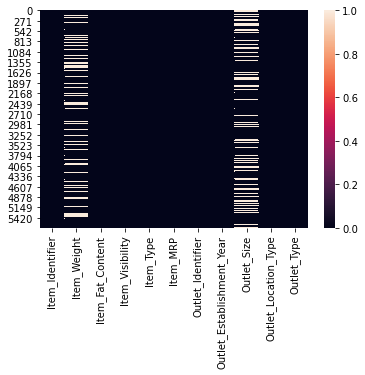

In [73]:
sns.heatmap(test.isnull())

In [74]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

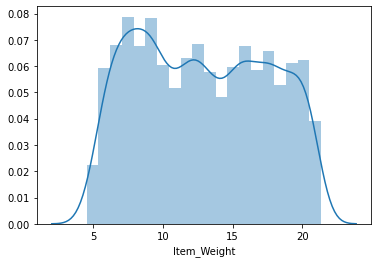

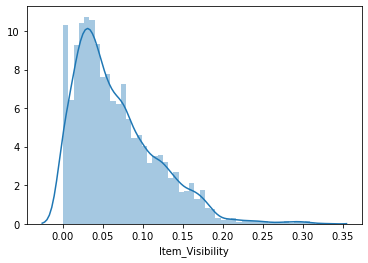

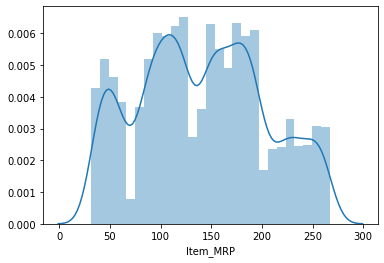

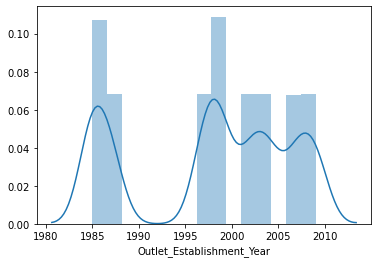

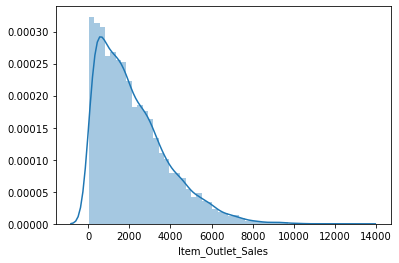

In [75]:
for i in train.describe().columns:
    sns.distplot(train[i].dropna())
    plt.show()

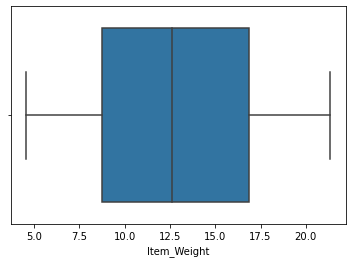

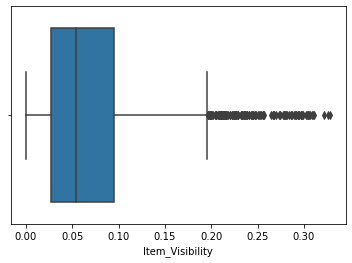

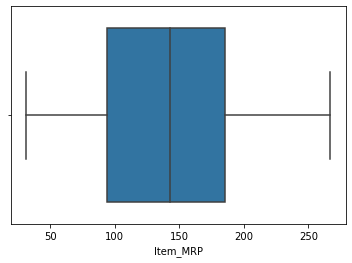

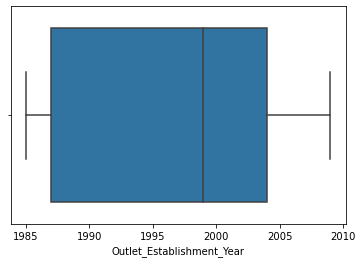

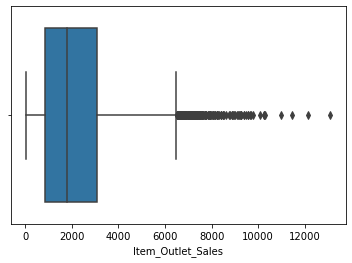

In [76]:
for i in train.describe().columns:
    sns.boxplot(train[i].dropna())
    plt.show()

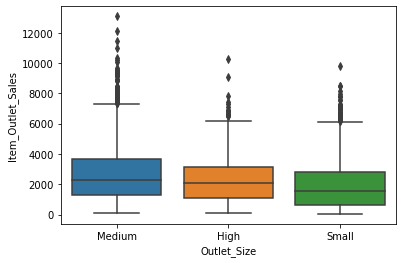

In [77]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train)
plt.show()

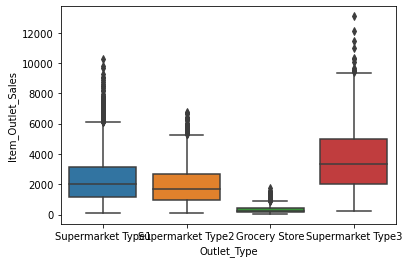

In [78]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train)

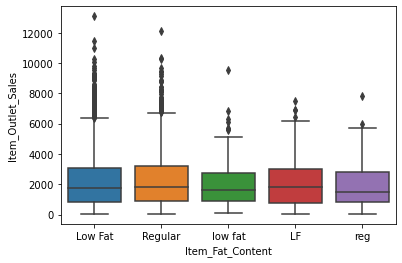

In [79]:
sns.boxplot(x ='Item_Fat_Content' ,y='Item_Outlet_Sales',data=train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

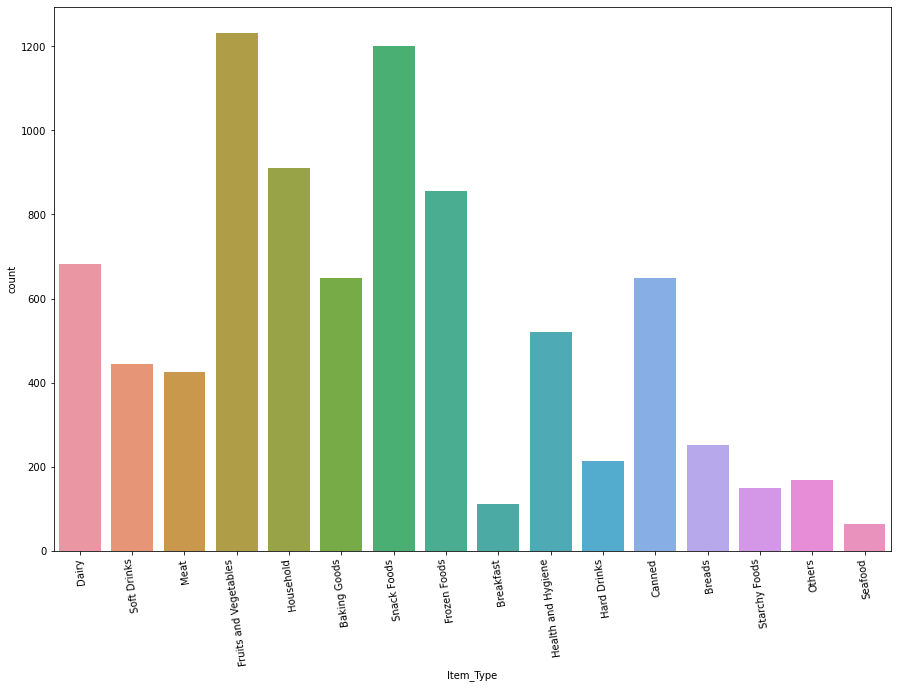

In [80]:
plt.figure(figsize=(15,10))
sns.countplot(train.Item_Type)
plt.xticks(rotation=98)

In [81]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

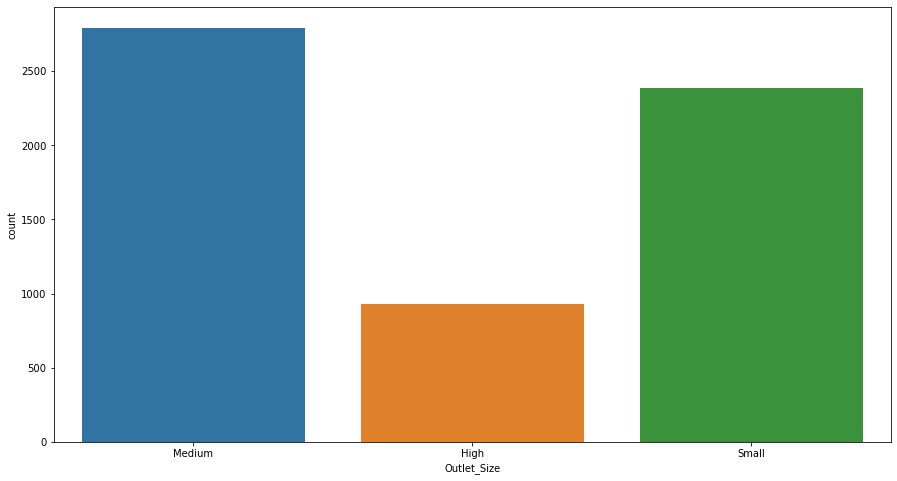

In [82]:
plt.figure(figsize=(15,8))
sns.countplot(train.Outlet_Size)

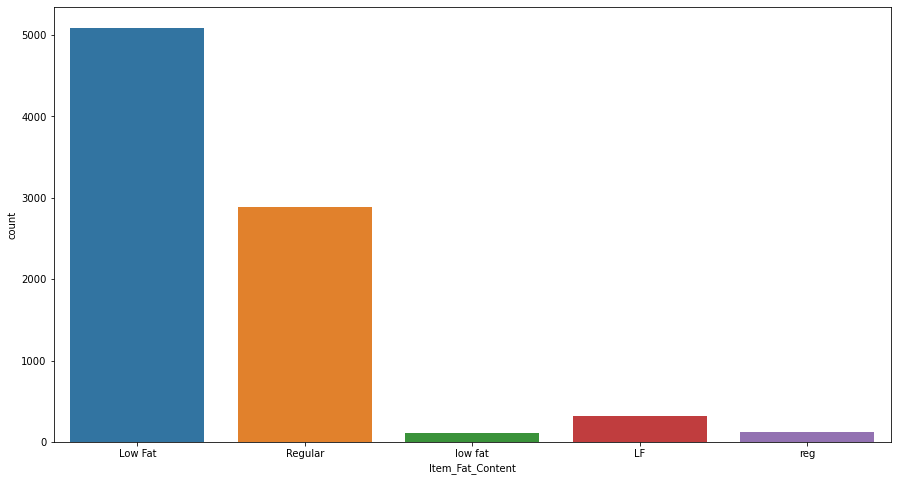

In [83]:
plt.figure(figsize=(15,8))
sns.countplot(train.Item_Fat_Content)

<function matplotlib.pyplot.show(*args, **kw)>

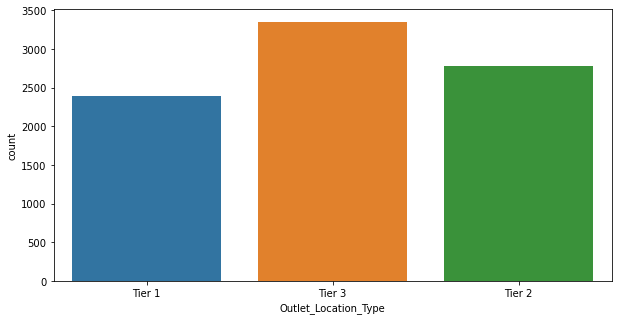

In [84]:
plt.figure(figsize=(10,5))
sns.countplot(train.Outlet_Location_Type)
plt.show

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

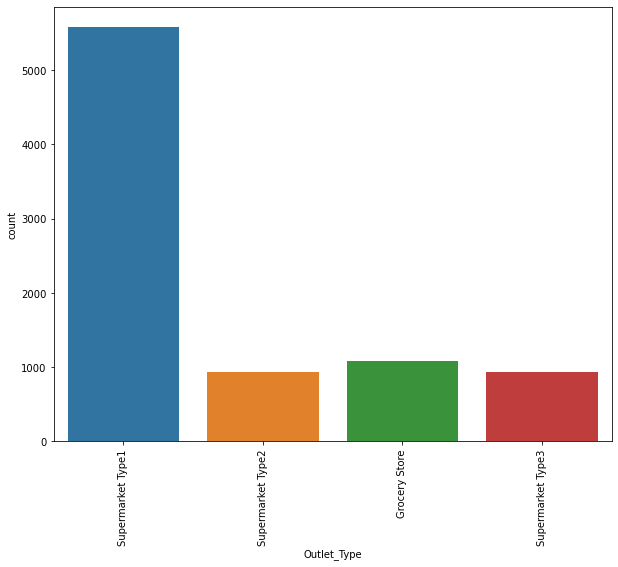

In [85]:
plt.figure(figsize=(10,8))
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

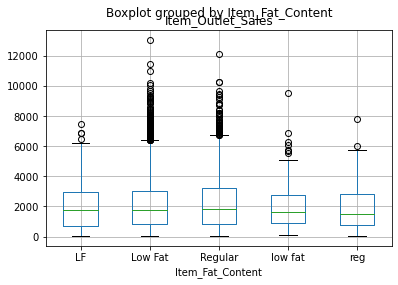

In [86]:
train.boxplot(column='Item_Outlet_Sales',by='Item_Fat_Content')

Item_Weight                     AxesSubplot(0.125,0.657941;0.0945122x0.222059)
Item_Visibility              AxesSubplot(0.238415,0.657941;0.0945122x0.222059)
Item_MRP                     AxesSubplot(0.351829,0.657941;0.0945122x0.222059)
Outlet_Establishment_Year    AxesSubplot(0.465244,0.657941;0.0945122x0.222059)
Item_Outlet_Sales            AxesSubplot(0.578659,0.657941;0.0945122x0.222059)
dtype: object

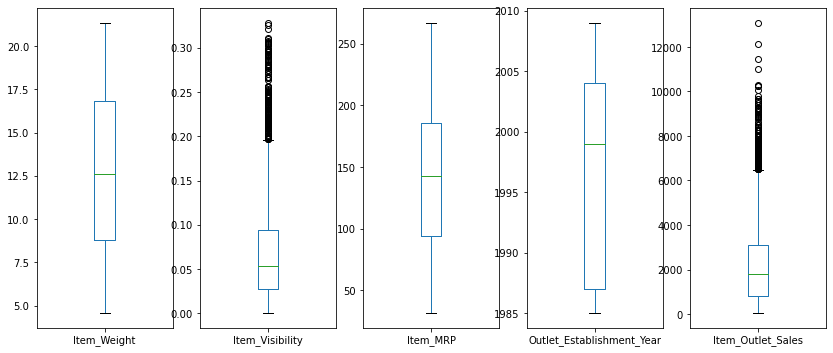

In [87]:
train.plot(kind='box',subplots=True,layout=(3,7),figsize=(20,20))

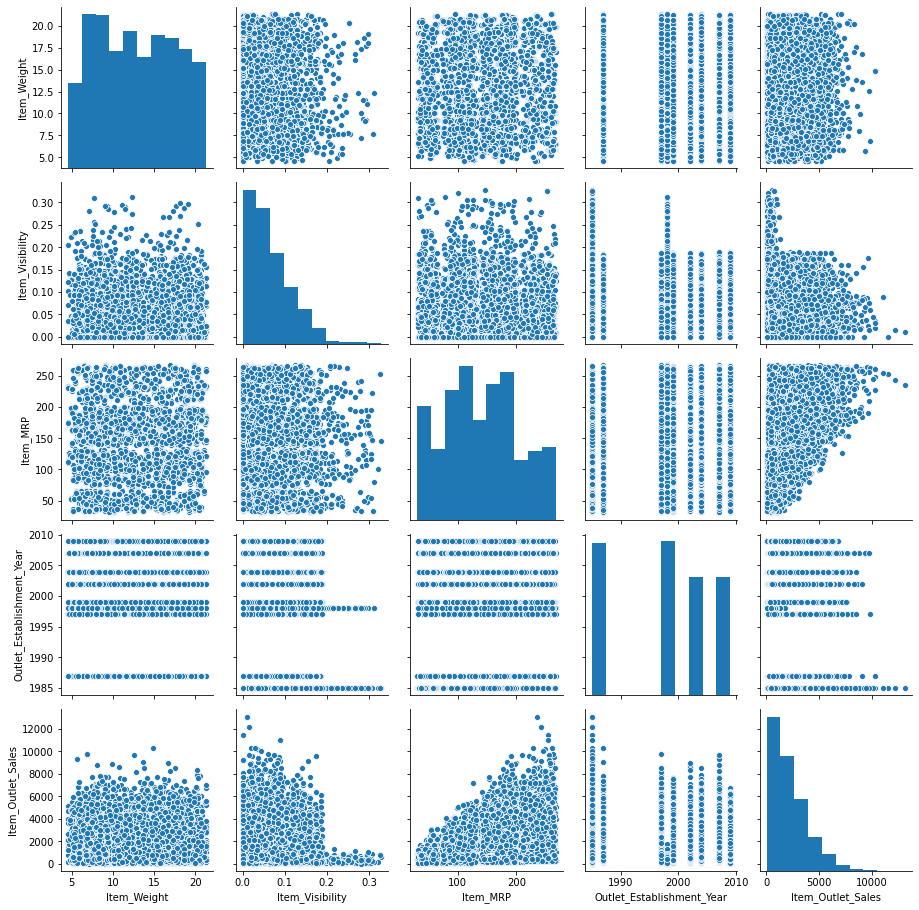

In [88]:
sns.pairplot(train)

In [89]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


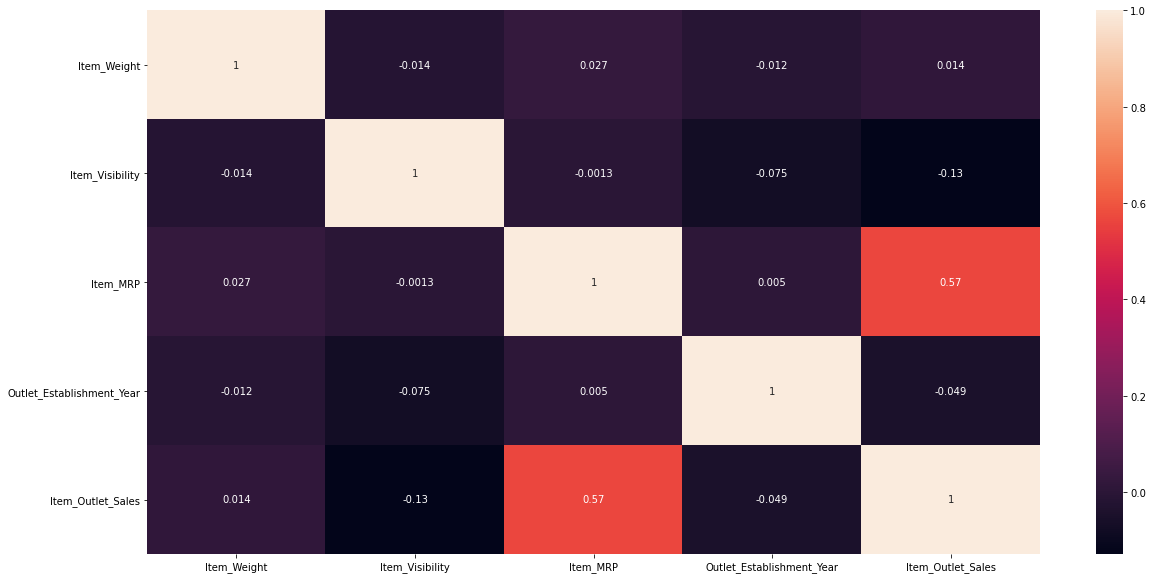

In [90]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True)
plt.show()

In [91]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [92]:
train["Item_Weight"].fillna(train['Item_Weight'].mean(),inplace=True)

In [93]:
train['Outlet_Size'].fillna("Medium",inplace=True)

In [94]:
train[train['Item_Visibility']==0]['Item_Visibility'].count()

526

In [95]:
train['Item_Visibility'].fillna(train['Item_Visibility'].median(),inplace=True)

In [96]:
test["Item_Weight"].fillna(test['Item_Weight'].mean(),inplace=True)

In [97]:
test['Outlet_Size'].fillna("Medium",inplace=True)

In [98]:
test[test['Item_Visibility']==0]['Item_Visibility'].count()

353

In [99]:
test['Item_Visibility'].fillna(test['Item_Visibility'].median(),inplace=True)

In [100]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [101]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [102]:
le=LabelEncoder()
list1=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for val in list1:
    train[val]=le.fit_transform(train[val].astype(str))

In [103]:
le=LabelEncoder()
list1=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for val in list1:
    test[val]=le.fit_transform(test[val].astype(str))

In [104]:
print("The shape before removing outliers and skewness",train.shape)
print("skewness before removing outliers")
print(train.skew())
from scipy.stats import zscore
z=np.abs(zscore(train))
train1=train[(z<3).all(axis=1)]
print("New shape after removing outliers",train1.shape)
print("skewness after removing outliers")
print(train1.skew())


The shape before removing outliers and skewness (8523, 12)
skewness before removing outliers
Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year    0.034270
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64
New shape after removing outliers (8222, 12)
skewness after removing outliers
Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.794506
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year    0.014337
Outlet_Size                 -0.089519
Outlet_Location_

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train2=scaler.fit_transform(train1)

In [106]:
train2=pd.DataFrame(train1,columns=train1.columns)

In [107]:
train2.skew()

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.794506
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year    0.014337
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                  0.957163
Item_Outlet_Sales            0.877476
dtype: float64

In [108]:
for i in train1.columns:
    if train2.skew().loc[i]>0.55:
        train2[i]=np.log1p(train2[i])

In [109]:
train2.skew()

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.711512
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year    0.014337
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                 -0.236229
Item_Outlet_Sales           -0.936422
dtype: float64

In [134]:
print("The shape before removing outliers and skewness",test.shape)
print("skewness before removing outliers")
print(test.skew())
from scipy.stats import zscore
z=np.abs(zscore(test))
test1=test[(z<3).all(axis=1)]
print("New shape after removing outliers",test1.shape)
print("skewness after removing outliers")
print(test1.skew())


The shape before removing outliers and skewness (5681, 11)
skewness before removing outliers
Item_Identifier             -0.000020
Item_Weight                  0.142813
Item_Fat_Content             0.999629
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year    0.034635
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64
New shape after removing outliers (5525, 11)
skewness after removing outliers
Item_Identifier             -0.004227
Item_Weight                  0.139099
Item_Fat_Content             0.275609
Item_Visibility              0.786385
Item_Type                    0.087677
Item_MRP                     0.130290
Outlet_Identifier           -0.069567
Outlet_Establishment_Year    0.015852
Outlet_Size                 -0.080824
Outlet_Location_Type        -0.214502
Outlet_Type     

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test2=scaler.fit_transform(test1)

In [136]:
test2=pd.DataFrame(test1,columns=test1.columns)

In [137]:
train2.skew()

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.711512
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year    0.014337
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                 -0.236229
Item_Outlet_Sales           -0.936422
dtype: float64

In [138]:
for i in test1.columns:
    if test2.skew().loc[i]>0.55:
        test2[i]=np.log1p(test2[i])

In [142]:
test2.skew()

Item_Identifier             -0.004227
Item_Weight                  0.139099
Item_Fat_Content             0.275609
Item_Visibility              0.701178
Item_Type                    0.087677
Item_MRP                     0.130290
Outlet_Identifier           -0.069567
Outlet_Establishment_Year    0.015852
Outlet_Size                 -0.080824
Outlet_Location_Type        -0.214502
Outlet_Type                 -0.221555
dtype: float64

In [110]:
x=train2.iloc[:,0:-1]
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,1,0.015920,4,249.8092,9,4,1,0,0.693147
1,8,5.920,2,0.019095,14,48.2692,3,8,1,2,1.098612
2,662,17.500,1,0.016621,10,141.6180,9,4,1,0,0.693147
3,1121,19.200,2,0.000000,6,182.0950,0,3,1,2,0.000000
4,1297,8.930,1,0.000000,9,53.8614,1,1,0,2,0.693147
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.055230,13,214.5218,1,1,0,2,0.693147
8519,897,8.380,2,0.045912,0,108.1570,7,5,1,1,0.693147
8520,1357,10.600,1,0.034581,8,85.1224,6,6,2,1,0.693147
8521,681,7.210,2,0.135597,13,103.1332,3,8,1,2,1.098612


In [111]:
y=train2.iloc[:,-1]
y

0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8222, dtype: float64

In [112]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [113]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print("max r2 score corresponding to",final_i,"is",max_r_score)
    return final_i

In [114]:
lreg=LinearRegression()
i=maxr2_score(lreg,x,y)

max r2 score corresponding to 70 is 0.6431073373728419


In [115]:
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=100,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression",cross_val_score(lreg,x,y,cv=20,scoring="r2").std())


Mean r2 score for Linear Regression: 0.6138811442607984
standard deviation in r2 score for Linear Regression 0.03531517644145904


In [116]:
knr=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(knr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
gd=GridSearchCV(lsreg,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

dtr=DecisionTreeRegressor()
parameters={'criterion':('mse', 'friedman_mse', 'mae')}
gd=GridSearchCV(dtr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

{'n_neighbors': 10}


{'alpha': 0.001}


{'criterion': 'mae'}




In [117]:
knr=KNeighborsRegressor(n_neighbors=10)
i=maxr2_score(knr,x,y)
print("\n")

print("Mean r2 score for KNeighbor  Regression:",cross_val_score(knr,x,y,cv=40,scoring="r2").mean())
print("standard deviation in r2 score for KNeighbor   Regression",cross_val_score(knr,x,y,cv=20,scoring="r2").std())
print("\n___________________________________________________________________________________________________________\n")

lsreg=Lasso(alpha=0.001)
i=maxr2_score(lsreg,x,y)
print("\n")

print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=40,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lsreg,x,y,cv=20,scoring="r2").std())
print("\n___________________________________________________________________________________________________________\n")


dtr=DecisionTreeRegressor(criterion = 'mae')
i=maxr2_score(dtr,x,y)
print("\n")

print("Mean r2 score for DecisionTreeRegressor :",cross_val_score(dtr,x,y,cv=40,scoring="r2").mean())
print("standard deviation in r2 score for DecisionTreeRegressor",cross_val_score(dtr,x,y,cv=20,scoring="r2").std())

max r2 score corresponding to 95 is 0.25640607360318846


Mean r2 score for KNeighbor  Regression: 0.21525052162474667
standard deviation in r2 score for KNeighbor   Regression 0.04487570679450191

___________________________________________________________________________________________________________

max r2 score corresponding to 70 is 0.642733808356989


Mean r2 score for Lasso Regression: 0.6191022820282323
standard deviation in r2 score for Lasso Regression 0.035475417374323255

___________________________________________________________________________________________________________

max r2 score corresponding to 72 is 0.46735238429716186


Mean r2 score for DecisionTreeRegressor : 0.41479370924227366
standard deviation in r2 score for DecisionTreeRegressor 0.05724000930446602


In [118]:
rfr=RandomForestRegressor()
parameters={"n_estimators":[10,100,250,500],"max_features": ["auto", "sqrt", "log2"]}
clf=GridSearchCV(rfr,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'max_features': 'sqrt', 'n_estimators': 250}

In [120]:
rfr=RandomForestRegressor(max_features='sqrt',n_estimators=250)
i=maxr2_score(rfr,x,y)

max r2 score corresponding to 93 is 0.7343076324475533


In [121]:
print("Mean r2 score for RandomForestRegressor :",cross_val_score(rfr,x,y,cv=10,scoring="r2").mean())
print("standard deviation in r2 score for RandomForestRegressor ",cross_val_score(rfr,x,y,cv=5,scoring="r2").std())

Mean r2 score for RandomForestRegressor : 0.7084009321326666
standard deviation in r2 score for RandomForestRegressor  0.012380112181909025


In [133]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x,y)
    print(sv.score(x,y))

0.616802004962678
0.13382827409492037
0.22733870432377667


In [144]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= 88 ,test_size=0.20)
rfr=RandomForestRegressor(max_features='sqrt',n_estimators=250)
rfr.fit(x,y)
y_pred=rfr.predict(x_test)
y_pred

array([0.69314718, 0.69314718, 0.69314718, ..., 0.        , 0.69314718,
       0.69314718])

In [148]:
r2_score(y_test,y_pred)

0.999994018849396

# I choose Random Forest Regressor as my final model because it perform very well in the data set

In [145]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is:",r2_score(y_test,y_pred))

RMSE is:  0.0008618395644907814
r2_score is: 0.999994018849396


In [146]:
import joblib
joblib.dump(rfr,'BigDatamart_sales.pkl')

['BigDatamart_sales.pkl']

In [154]:
rfr_from_joblib=joblib.load('BigDatamart_sales.pkl')
rgr_from_joblib.predict(x_text)


NameError: name 'rgr_from_joblib' is not defined